<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Euler_Beam_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

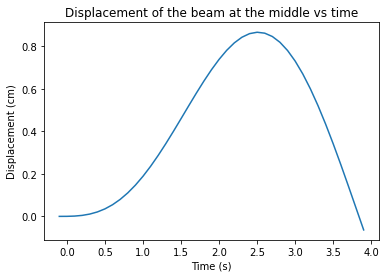

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the input parameters
E = 29000000.0 # Modulus of elasticity (kN/m2)
I = 0.00423 # Moment of inertia of the cross-section (m4)
Area = 0.69 # Area of the cross-section (m2)
L = 4.0 # Length of beam (m)
p = 27395.515 # Mass/volume unit (kg/m3)
kf = 1500.0 # Modulus of the subgrafe reaction (kN/m2)
Pe = 500.0 # External moving load (kN)
c = 1.00 # Velocity of the external load (m/sec)

# A. STEP: Solution of eigenvalue problem -> Calculation of eigenfrequencies and
# eigenvectors: EI*(d4X/dx4)+(kf-wn2*p*Area)*X=0
# First eigenfrequency
n = 1
wn = np.sqrt((1/(p*Area))*((((n**4)*(np.pi**4)*E*I)/(L**4))+kf))
# First eigenvector - value in the middle of the beam : x=L/2
Pn = ((wn**2*p*Area-kf)/(E*I))**(1/4)
X1L2 = np.sin(Pn*(L/2))

# B. STEP: Calculation of the generalized parameters qi(t)
# (dqi2/dt2)+((wn2*Mn+kf*Nn)/Mn)*qi=(Pe/Mn)*sin(Pn*c*t)
wn2 = wn**2
Nn = (L/2)-(np.sin(2*Pn*L)/(4*Pn))
Mn = p*Area*Nn
k = Pe/Mn
beta = (wn2*Mn+kf*Nn)/Mn
A1mat = np.zeros(41)
A2mat = np.zeros(41)

def damped_vibration(y, t):
    q1 = y[0]
    q2 = y[1]
    dq1dt = q2
    dq2dt = k*np.sin(Pn*c*t) - beta*q1
    return [dq1dt, dq2dt]

initial_conditions = [0, 0]
t = np.linspace(0, 4.0, 41)
q = odeint(damped_vibration, initial_conditions, t)
q1 = q[:, 0]

for i in range(41):
    A1mat[i] = 0.1*i-0.1 # Time t (sec)
    A2mat[i] = X1L2*q1[i]*100 # Displacement (cm)

plt.plot(A1mat, A2mat)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.title('Displacement of the beam at the middle vs time')
plt.show()


In [2]:
import numpy as np
import pandas as pd

# Define the input parameters
E = 29000000.0 # Modulus of elasticity (kN/m2)
I = 0.00423 # Moment of inertia of the cross-section (m4)
Area = 0.69 # Area of the cross-section (m2)
L = 4.0 # Length of beam (m)
p = 27395.515 # Mass/volume unit (kg/m3)
kf = 1500.0 # Modulus of the subgrafe reaction (kN/m2)
Pe = 500.0 # External moving load (kN)
c = 1.00 # Velocity of the external load (m/sec)

# A. STEP: Solution of eigenvalue problem -> Calculation of eigenfrequencies and
# eigenvectors: EI*(d4X/dx4)+(kf-wn2*p*Area)*X=0
# First eigenfrequency
n = 1
wn = np.sqrt((1/(p*Area))*((((n**4)*(np.pi**4)*E*I)/(L**4))+kf))
# First eigenvector - value in the middle of the beam : x=L/2
Pn = ((wn**2*p*Area-kf)/(E*I))**(1/4)
X1L2 = np.sin(Pn*(L/2))

# B. STEP: Calculation of the generalized parameters qi(t)
# (dqi2/dt2)+((wn2*Mn+kf*Nn)/Mn)*qi=(Pe/Mn)*sin(Pn*c*t)
wn2 = wn**2
Nn = (L/2)-(np.sin(2*Pn*L)/(4*Pn))
Mn = p*Area*Nn
k = Pe/Mn
beta = (wn2*Mn+kf*Nn)/Mn
A1mat = np.zeros(41)
A2mat = np.zeros(41)

def damped_vibration(y, t):
    q1 = y[0]
    q2 = y[1]
    dq1dt = q2
    dq2dt = k*np.sin(Pn*c*t) - beta*q1
    return [dq1dt, dq2dt]

initial_conditions = [0, 0]
t = np.linspace(0, 4.0, 41)
q = odeint(damped_vibration, initial_conditions, t)
q1 = q[:, 0]

for i in range(41):
    A1mat[i] = 0.1*i-0.1 # Time t (sec)
    A2mat[i] = X1L2*q1[i]*100 # Displacement (cm)

# Export the results as a table
df = pd.DataFrame({'Time (s)': A1mat, 'Displacement (cm)': A2mat})
df.to_csv('results.csv', index=False)

print('Results exported to results.csv')


Results exported to results.csv


In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the input parameters
E = 29000000.0 # Modulus of elasticity (kN/m2)
I = 0.00423 # Moment of inertia of the cross-section (m4)
Area = 0.69 # Area of the cross-section (m2)
L = 4.0 # Length of beam (m)
p = 27395.515 # Mass/volume unit (kg/m3)
kf = 1500.0 # Modulus of the subgrafe reaction (kN/m2)
Pe = 500.0 # External moving load (kN)
c = 1.00 # Velocity of the external load (m/sec)

# A. STEP: Solution of eigenvalue problem -> Calculation of eigenfrequencies and
# eigenvectors: EI*(d4X/dx4)+(kf-wn2*p*Area)*X=0
# First eigenfrequency
n = 1
wn = np.sqrt((1/(p*Area))*((((n**4)*(np.pi**4)*E*I)/(L**4))+kf))
# First eigenvector - value in the middle of the beam : x=L/2
Pn = ((wn**2*p*Area-kf)/(E*I))**(1/4)
X1L2 = np.sin(Pn*(L/2))

# B. STEP: Calculation of the generalized parameters qi(t)
# (dqi2/dt2)+((wn2*Mn+kf*Nn)/Mn)*qi=(Pe/Mn)*sin(Pn*c*t)
wn2 = wn**2
Nn = (L/2)-(np.sin(2*Pn*L)/(4*Pn))
Mn = p*Area*Nn
k = Pe/Mn
beta = (wn2*Mn+kf*Nn)/Mn
A1mat = np.zeros(10)
A2mat = np.zeros(10)

def damped_vibration(y, t):
    q1 = y[0]
    q2 = y[1]
    dq1dt = q2
    dq2dt = k*np.sin(Pn*c*t) - beta*q1
    return [dq1dt, dq2dt]

initial_conditions = [0, 0]
t = np.linspace(0, 4.0, 41)
q = odeint(damped_vibration, initial_conditions, t)
q1 = q[:, 0]

# Train a Random Forest regression model using the first 10 results
for i in range(10):
    A1mat[i] = 0.1*i-0.1 # Time t (sec)
    A2mat[i] = X1L2*q1[i]*100 # Displacement (cm)

X_train = A1mat.reshape(-1, 1)
y_train = A2mat.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the displacement of the beam using the trained model
X_test = np.linspace(0, 0.9, 10).reshape(-1, 1)
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(A2mat, rf.predict(X_train))

# Print the results
print('Training set:')
print(pd.DataFrame({'Time (s)': A1mat, 'Displacement (cm)': A2mat}))

print('\nRandom Forest predictions:')


Training set:
   Time (s)  Displacement (cm)
0      -0.1           0.000000
1       0.0           0.000173
2       0.1           0.001376
3       0.2           0.004606
4       0.3           0.010795
5       0.4           0.020776
6       0.5           0.035260
7       0.6           0.054807
8       0.7           0.079810
9       0.8           0.110472

Random Forest predictions:


<ipython-input-4-b6633f10eee5>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the input parameters
E = 29000000.0 # Modulus of elasticity (kN/m2)
I = 0.00423 # Moment of inertia of the cross-section (m4)
Area = 0.69 # Area of the cross-section (m2)
L = 4.0 # Length of beam (m)
p = 27395.515 # Mass/volume unit (kg/m3)
kf = 1500.0 # Modulus of the subgrafe reaction (kN/m2)
Pe = 500.0 # External moving load (kN)
c = 1.00 # Velocity of the external load (m/sec)

# A. STEP: Solution of eigenvalue problem -> Calculation of eigenfrequencies and
# eigenvectors: EI*(d4X/dx4)+(kf-wn2*p*Area)*X=0
# First eigenfrequency
n = 1
wn = np.sqrt((1/(p*Area))*((((n**4)*(np.pi**4)*E*I)/(L**4))+kf))
# First eigenvector - value in the middle of the beam : x=L/2
Pn = ((wn**2*p*Area-kf)/(E*I))**(1/4)
X1L2 = np.sin(Pn*(L/2))

# B. STEP: Calculation of the generalized parameters qi(t)
# (dqi2/dt2)+((wn2*Mn+kf*Nn)/Mn)*qi=(Pe/Mn)*sin(Pn*c*t)
wn2 = wn**2
Nn = (L/2)-(np.sin(2*Pn*L)/(4*Pn))
Mn = p*Area*Nn
k = Pe/Mn
beta = (wn2*Mn+kf*Nn)/Mn
A1mat = np.zeros(10)
A2mat = np.zeros(10)

def damped_vibration(y, t):
    q1 = y[0]
    q2 = y[1]
    dq1dt = q2
    dq2dt = k*np.sin(Pn*c*t) - beta*q1
    return [dq1dt, dq2dt]

initial_conditions = [0, 0]
t = np.linspace(0, 4.0, 41)
q = odeint(damped_vibration, initial_conditions, t)
q1 = q[:, 0]

# Train a Random Forest regression model using the first 10 results
for i in range(10):
    A1mat[i] = 0.1*i-0.1 # Time t (sec)
    A2mat[i] = X1L2*q1[i]*100 # Displacement (cm)

X_train = A1mat.reshape(-1, 1)
y_train = A2mat.reshape(-1)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the displacement of the beam using the trained model
X_test = np.linspace(0, 0.9, 10).reshape(-1, 1)
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(A2mat, rf.predict(X_train))

# Print the results
print('Training set:')
print(pd.DataFrame({'Time (s)': A1mat, 'Displacement (cm)': A2mat}))

print('\nRandom Forest predictions:')
print(pd.DataFrame({'Time (s)': A1mat, 'Displacement (cm)': A2mat}))

print('\nRandom Forest predictions:')


Training set:
   Time (s)  Displacement (cm)
0      -0.1           0.000000
1       0.0           0.000173
2       0.1           0.001376
3       0.2           0.004606
4       0.3           0.010795
5       0.4           0.020776
6       0.5           0.035260
7       0.6           0.054807
8       0.7           0.079810
9       0.8           0.110472

Random Forest predictions:
   Time (s)  Displacement (cm)
0      -0.1           0.000000
1       0.0           0.000173
2       0.1           0.001376
3       0.2           0.004606
4       0.3           0.010795
5       0.4           0.020776
6       0.5           0.035260
7       0.6           0.054807
8       0.7           0.079810
9       0.8           0.110472

Random Forest predictions:


In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.integrate import odeint

# Define the input parameters
E = 29000000.0 # Modulus of elasticity (kN/m2)
I = 0.00423 # Moment of inertia of the cross-section (m4)
Area = 0.69 # Area of the cross-section (m2)
L = 4.0 # Length of beam (m)
p = 27395.515 # Mass/volume unit (kg/m3)
kf = 1500.0 # Modulus of the subgrafe reaction (kN/m2)
Pe = 500.0 # External moving load (kN)
c = 1.00 # Velocity of the external load (m/sec)

# A. STEP: Solution of eigenvalue problem -> Calculation of eigenfrequencies and
# eigenvectors: EI*(d4X/dx4)+(kf-wn2*p*Area)*X=0
# First eigenfrequency
n = 1
wn = np.sqrt((1/(p*Area))*((((n**4)*(np.pi**4)*E*I)/(L**4))+kf))
# First eigenvector - value in the middle of the beam : x=L/2
Pn = ((wn**2*p*Area-kf)/(E*I))**(1/4)
X1L2 = np.sin(Pn*(L/2))

# B. STEP: Calculation of the generalized parameters qi(t)
# (dqi2/dt2)+((wn2*Mn+kf*Nn)/Mn)*qi=(Pe/Mn)*sin(Pn*c*t)
wn2 = wn**2
Nn = (L/2)-(np.sin(2*Pn*L)/(4*Pn))
Mn = p*Area*Nn
k = Pe/Mn
beta = (wn2*Mn+kf*Nn)/Mn
A1mat = np.zeros(41)
A2mat = np.zeros(41)

def damped_vibration(y, t):
    q1 = y[0]
    q2 = y[1]
    dq1dt = q2
    dq2dt = k*np.sin(Pn*c*t) - beta*q1
    return [dq1dt, dq2dt]

initial_conditions = [0, 0]
t = np.linspace(0, 4.0, 41)
q = odeint(damped_vibration, initial_conditions, t)
q1 = q[:, 0]

# Train a Random Forest regression model using the first 20 results as training set
if len(A1mat) >= 20:
    for i in range(20):
        A1mat[i] = 0.1*i-0.1 # Time t (sec)
        A2mat[i] = X1L2*q1[i]*100 # Displacement (cm)

    X_train = A1mat.reshape(-1, 1)[:20]
    y_train = A2mat.reshape(-1)[:20]

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict the displacement of the beam using the trained model on the test set
    X_test = A1mat.reshape(-1, 1)[20:]
    y_test = A2mat.reshape(-1)[20:]
    y_pred = rf.predict(X_test)

    # Calculate the mean squared error of the predictions on the training set
    mse_train = mean_squared_error(y_train, rf.predict(X_train))

    # Calculate the mean squared error of the predictions on the test set
    mse_test = mean_squared_error(y_test, y_pred)

    # Print the results
    print('Random Forest predictions:')
    results_df = pd.DataFrame({'Time (sec)': X_test.reshape(-1),
                              'Displacement (cm) - Actual': y_test,
                              'Displacement (cm) - Predicted': y_pred})
    print(results_df.to_string(index=False))

    print('\nRandom Forest Mean Squared Error:')
    print('Training set:', mse_train)
    print('Test set:', mse_test)
else:
    print('Not enough samples to create a test set.')


Random Forest predictions:
 Time (sec)  Displacement (cm) - Actual  Displacement (cm) - Predicted
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0                       0.000773
        0.0                         0.0           

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.integrate import odeint

# Define the input parameters
E = 29000000.0 # Modulus of elasticity (kN/m2)
I = 0.00423 # Moment of inertia of the cross-section (m4)
Area = 0.69 # Area of the cross-section (m2)
L = 4.0 # Length of beam (m)
p = 27395.515 # Mass/volume unit (kg/m3)
kf = 1500.0 # Modulus of the subgrafe reaction (kN/m2)
Pe = 500.0 # External moving load (kN)
c = 1.00 # Velocity of the external load (m/sec)

# A. STEP: Solution of eigenvalue problem -> Calculation of eigenfrequencies and
# eigenvectors: EI*(d4X/dx4)+(kf-wn2*p*Area)*X=0
# First eigenfrequency
n = 1
wn = np.sqrt((1/(p*Area))*((((n**4)*(np.pi**4)*E*I)/(L**4))+kf))
# First eigenvector - value in the middle of the beam : x=L/2
Pn = ((wn**2*p*Area-kf)/(E*I))**(1/4)
X1L2 = np.sin(Pn*(L/2))

# B. STEP: Calculation of the generalized parameters qi(t)
# (dqi2/dt2)+((wn2*Mn+kf*Nn)/Mn)*qi=(Pe/Mn)*sin(Pn*c*t)
wn2 = wn**2
Nn = (L/2)-(np.sin(2*Pn*L)/(4*Pn))
Mn = p*Area*Nn
k = Pe/Mn
beta = (wn2*Mn+kf*Nn)/Mn
A1mat = np.zeros(41)
A2mat = np.zeros(41)

def damped_vibration(y, t):
    q1 = y[0]
    q2 = y[1]
    dq1dt = q2
    dq2dt = k*np.sin(Pn*c*t) - beta*q1
    return [dq1dt, dq2dt]

initial_conditions = [0, 0]
t = np.linspace(0, 4.0, 41)
q = odeint(damped_vibration, initial_conditions, t)
q1 = q[:, 0]

# Train a Random Forest regression model using the first 20 results as training set
for i in range(20):
    A1mat[i] = 0.1*i-0.1 # Time t (sec)
    A2mat[i] = X1L2*q1[i]*100 # Displacement (cm)

X_train = A1mat.reshape(-1, 1)[:20]
y_train = A2mat.reshape(-1)[:20]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Forecast the displacement of the beam using the trained model on the remaining results
for i in range(20, 41):
    A1mat[i] = 0.1*i-0.1 # Time t (sec)
    A2mat[i] = X1L2*q1[i]*100 # Displacement (cm)

# Split the remaining results into a test set
X_test = A1mat.reshape(-1, 1)[20:]
y_test = A2mat.reshape(-1)[20:]

# Make predictions on the test set using the trained model
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions on the training set
mse_train = mean_squared_error(y_train, rf.predict(X_train))

# Calculate the mean squared error of the predictions on the test set
mse_test = mean_squared_error(y_test, y_pred)

# Print the results
print('Random Forest predictions:')
results_df = pd.DataFrame({'Time (sec)': X_test.reshape(-1),
'Displacement (cm) - Actual': y_test,
'Displacement (cm) - Predicted': y_pred})
print(results_df.to_string(index=False))

print('\nRandom Forest Mean Squared Error:')
print('Training set:', mse_train)
print('Test set:', mse_test)


Random Forest predictions:
 Time (sec)  Displacement (cm) - Actual  Displacement (cm) - Predicted
        1.9                    0.689619                       0.610012
        2.0                    0.738334                       0.610012
        2.1                    0.780838                       0.610012
        2.2                    0.815893                       0.610012
        2.3                    0.842379                       0.610012
        2.4                    0.859320                       0.610012
        2.5                    0.865912                       0.610012
        2.6                    0.861551                       0.610012
        2.7                    0.845844                       0.610012
        2.8                    0.818628                       0.610012
        2.9                    0.779975                       0.610012
        3.0                    0.730195                       0.610012
        3.1                    0.669835           

In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.integrate import odeint

# Define the input parameters
E = 29000000.0 # Modulus of elasticity (kN/m2)
I = 0.00423 # Moment of inertia of the cross-section (m4)
Area = 0.69 # Area of the cross-section (m2)
L = 4.0 # Length of beam (m)
p = 27395.515 # Mass/volume unit (kg/m3)
kf = 1500.0 # Modulus of the subgrafe reaction (kN/m2)
Pe = 500.0 # External moving load (kN)
c = 1.00 # Velocity of the external load (m/sec)

# A. STEP: Solution of eigenvalue problem -> Calculation of eigenfrequencies and
# eigenvectors: EI*(d4X/dx4)+(kf-wn2*p*Area)*X=0
# First eigenfrequency
n = 1
wn = np.sqrt((1/(p*Area))*((((n**4)*(np.pi**4)*E*I)/(L**4))+kf))
# First eigenvector - value in the middle of the beam : x=L/2
Pn = ((wn**2*p*Area-kf)/(E*I))**(1/4)
X1L2 = np.sin(Pn*(L/2))

# B. STEP: Calculation of the generalized parameters qi(t)
# (dqi2/dt2)+((wn2*Mn+kf*Nn)/Mn)*qi=(Pe/Mn)*sin(Pn*c*t)
wn2 = wn**2
Nn = (L/2)-(np.sin(2*Pn*L)/(4*Pn))
Mn = p*Area*Nn
k = Pe/Mn
beta = (wn2*Mn+kf*Nn)/Mn
A1mat = np.zeros(81)
A2mat = np.zeros(81)

def damped_vibration(y, t):
    q1 = y[0]
    q2 = y[1]
    dq1dt = q2
    dq2dt = k*np.sin(Pn*c*t) - beta*q1
    return [dq1dt, dq2dt]

initial_conditions = [0, 0]
t = np.linspace(0, 8.0, 81)
q = odeint(damped_vibration, initial_conditions, t)
q1 = q[:, 0]

# Train a Random Forest regression model using the first 50 results as training set
for i in range(50):
    A1mat[i] = 0.1*i-0.1 # Time t (sec)
    A2mat[i] = X1L2*q1[i]*100 # Displacement (cm)

X_train = A1mat.reshape(-1, 1)[:50]
y_train = A2mat.reshape(-1)[:50]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Forecast the displacement of the beam using the trained model on the remaining results
for i in range(50, 81):
    A1mat[i] = 0.1*i-0.1 # Time t (sec)
    A2mat[i] = X1L2*q1[i]*100 # Displacement (cm)

X_test = A1mat.reshape(-1, 1)[50:]
y_test = A2mat.reshape(-1)[50:]

# Make predictions on the test set using the trained model
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions on the training set
mse_train = mean_squared_error(y_train, rf.predict(X_train))

# Calculate the mean squared error of the predictions on the test set
mse_test = mean_squared_error(y_test, y_pred)

# Print the results
print('Random Forest predictions:')
results_df = pd.DataFrame({'Time (sec)': X_test.reshape(-1),
'Displacement (cm) - Actual': y_test,
'Displacement (cm) - Predicted': y_pred})
print(results_df.to_string(index=False))

print('\nRandom Forest Mean Squared Error:')
print('Training set:', mse_train)
print('Test set:', mse_test)

Random Forest predictions:
 Time (sec)  Displacement (cm) - Actual  Displacement (cm) - Predicted
        4.9                   -0.773559                      -0.725655
        5.0                   -0.791764                      -0.725655
        5.1                   -0.799236                      -0.725655
        5.2                   -0.796422                      -0.725655
        5.3                   -0.783969                      -0.725655
        5.4                   -0.762712                      -0.725655
        5.5                   -0.733640                      -0.725655
        5.6                   -0.697875                      -0.725655
        5.7                   -0.656635                      -0.725655
        5.8                   -0.611205                      -0.725655
        5.9                   -0.562896                      -0.725655
        6.0                   -0.513017                      -0.725655
        6.1                   -0.462835           

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split

# Define the input parameters
E = 29000000.0 # Modulus of elasticity (kN/m2)
I = 0.00423 # Moment of inertia of the cross-section (m4)
Area = 0.69 # Area of the cross-section (m2)
L = 4.0 # Length of beam (m)
p = 27395.515 # Mass/volume unit (kg/m3)
kf = 1500.0 # Modulus of the subgrafe reaction (kN/m2)
Pe = 500.0 # External moving load (kN)
c = 1.00 # Velocity of the external load (m/sec)

# A. STEP: Solution of eigenvalue problem -> Calculation of eigenfrequencies and
# eigenvectors: EI*(d4X/dx4)+(kf-wn2*p*Area)*X=0
# First eigenfrequency
n = 1
wn = np.sqrt((1/(p*Area))*((((n**4)*(np.pi**4)*E*I)/(L**4))+kf))
# First eigenvector - value in the middle of the beam : x=L/2
Pn = ((wn**2*p*Area-kf)/(E*I))**(1/4)
X1L2 = np.sin(Pn*(L/2))

# B. STEP: Calculation of the generalized parameters qi(t)
# (dqi2/dt2)+((wn2*Mn+kf*Nn)/Mn)*qi=(Pe/Mn)*sin(Pn*c*t)
wn2 = wn**2
Nn = (L/2)-(np.sin(2*Pn*L)/(4*Pn))
Mn = p*Area*Nn
k = Pe/Mn
beta = (wn2*Mn+kf*Nn)/Mn
A1mat = np.zeros(801)
A2mat = np.zeros(801)

def damped_vibration(y, t):
    q1 = y[0]
    q2 = y[1]
    dq1dt = q2
    dq2dt = k*np.sin(Pn*c*t) - beta*q1
    return [dq1dt, dq2dt]

initial_conditions = [0, 0]
t = np.linspace(0, 8.0, 801)
q = odeint(damped_vibration, initial_conditions, t)
q1 = q[:, 0]

# Train-test split the data
A1mat = np.arange(0, 8.01, 0.01)
A2mat = X1L2*q1*100
X_train, X_test, y_train, y_test = train_test_split(A1mat.reshape(-1, 1), A2mat.reshape(-1), test_size=0.15, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set using the trained model
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions on the training set
mse_train = mean_squared_error(y_train, rf.predict(X_train))

# Calculate the mean squared error of the predictions on the test set
mse_test = mean_squared_error(y_test, y_pred)

# Print the results
print('Random Forest predictions:')
results_df = pd.DataFrame({'Time (sec)': X_test.reshape(-1),
'Displacement (cm) - Actual': y_test,
'Displacement (cm) - Predicted': y_pred})
print(results_df.to_string(index=False))

print('\nRandom Forest Mean Squared Error:')
print('Training set:', mse_train)
print('Test set:', mse_test)




Random Forest predictions:
 Time (sec)  Displacement (cm) - Actual  Displacement (cm) - Predicted
       6.97                   -0.171823                      -0.172793
       6.68                   -0.251871                      -0.250921
       0.63                    0.040571                       0.039417
       5.34                   -0.792554                      -0.793462
       0.66                    0.046351                       0.048037
       6.22                   -0.452868                      -0.458301
       3.46                    0.469492                       0.475642
       4.90                   -0.744396                      -0.746280
       5.57                   -0.743117                      -0.742454
       4.56                   -0.565224                      -0.561525
       0.65                    0.044372                       0.042475
       2.86                    0.830896                       0.832274
       6.36                   -0.384855           

In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the input parameters
E = 29000000.0 # Modulus of elasticity (kN/m2)
I = 0.00423 # Moment of inertia of the cross-section (m4)
Area = 0.69 # Area of the cross-section (m2)
L = 4.0 # Length of beam (m)
p = 27395.515 # Mass/volume unit (kg/m3)
kf = 1500.0 # Modulus of the subgrafe reaction (kN/m2)
Pe = 500.0 # External moving load (kN)
c = 1.00 # Velocity of the external load (m/sec)

# A. STEP: Solution of eigenvalue problem -> Calculation of eigenfrequencies and
# eigenvectors: EI*(d4X/dx4)+(kf-wn2*p*Area)*X=0
# First eigenfrequency
n = 1
wn = np.sqrt((1/(p*Area))*((((n**4)*(np.pi**4)*E*I)/(L**4))+kf))
# First eigenvector - value in the middle of the beam : x=L/2
Pn = ((wn**2*p*Area-kf)/(E*I))**(1/4)
X1L2 = np.sin(Pn*(L/2))

# B. STEP: Calculation of the generalized parameters qi(t)
# (dqi2/dt2)+((wn2*Mn+kf*Nn)/Mn)*qi=(Pe/Mn)*sin(Pn*c*t)
wn2 = wn**2
Nn = (L/2)-(np.sin(2*Pn*L)/(4*Pn))
Mn = p*Area*Nn
k = Pe/Mn
beta = (wn2*Mn+kf*Nn)/Mn
A1mat = np.zeros(801)
A2mat = np.zeros(801)

def damped_vibration(y, t):
    q1 = y[0]
    q2 = y[1]
    dq1dt = q2
    dq2dt = k*np.sin(Pn*c*t) - beta*q1
    return [dq1dt, dq2dt]

initial_conditions = [0, 0]
t = np.linspace(0, 8.0, 801)
q = odeint(damped_vibration, initial_conditions, t)
q1 = q[:, 0]

# Train-test split the data
A1mat = np.arange(0, 8.01, 0.01)
A2mat = X1L2*q1*100
X_train, X_test, y_train, y_test = train_test_split(A1mat.reshape(-1, 1), A2mat.reshape(-1), test_size=0.15, random_state=42)

# Hyperparameter tuning using grid search
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [50, 100, 200, 300, 400],
              'max_depth': [5, 10, 15, 20, 25, 30, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
rf = grid_search.best_estimator_

# Make predictions on the test set using the trained model
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions on the training set
mse_train = mean_squared_error(y_train, rf.predict(X_train))

# Calculate the mean squared error of the predictions on the test set
mse_test = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE), root mean squared error (RMSE), and coefficient of determination (R^2)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the results
print('Random Forest Best Parameters:')
print(grid_search.best_params_)

print('\nRandom Forest predictions:')
results_df = pd.DataFrame({'Time (sec)': X_test.reshape(-1),
'Displacement (cm) - Actual': y_test,
'Displacement (cm) - Predicted': y_pred})
print(results_df.to_string(index=False))

print('\nRandom Forest Performance Metrics:')
print('Training Set Mean Squared Error:', mse_train)
print('Test Set Mean Squared Error:', mse_test)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Coefficient of Determination (R^2):', r2)


Random Forest Best Parameters:
{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}

Random Forest predictions:
 Time (sec)  Displacement (cm) - Actual  Displacement (cm) - Predicted
       6.97                   -0.171823                      -0.172817
       6.68                   -0.251871                      -0.250701
       0.63                    0.040571                       0.039418
       5.34                   -0.792554                      -0.793422
       0.66                    0.046351                       0.048519
       6.22                   -0.452868                      -0.457791
       3.46                    0.469492                       0.474114
       4.90                   -0.744396                      -0.745841
       5.57                   -0.743117                      -0.742180
       4.56                   -0.565224                      -0.561336
       0.65                    0.044372                       0.042155
   